# Import Libs

In [30]:
# plt.style.available

In [ ]:
!pip install termcolor

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from sklearn.datasets import make_regression, load_boston
from termcolor import colored as c_
from random import randint
from sklearn.metrics import accuracy_score
import seaborn as  sns
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings("ignore")
plt.style.use("ggplot")
%matplotlib inline

# Generateing Linear Data

In [2]:
data = load_boston()
x = data.data
y = data.target.reshape(-1,1)
dataframe = pd.DataFrame(x,columns=data.feature_names)

# Plot HeatMap of Correlation

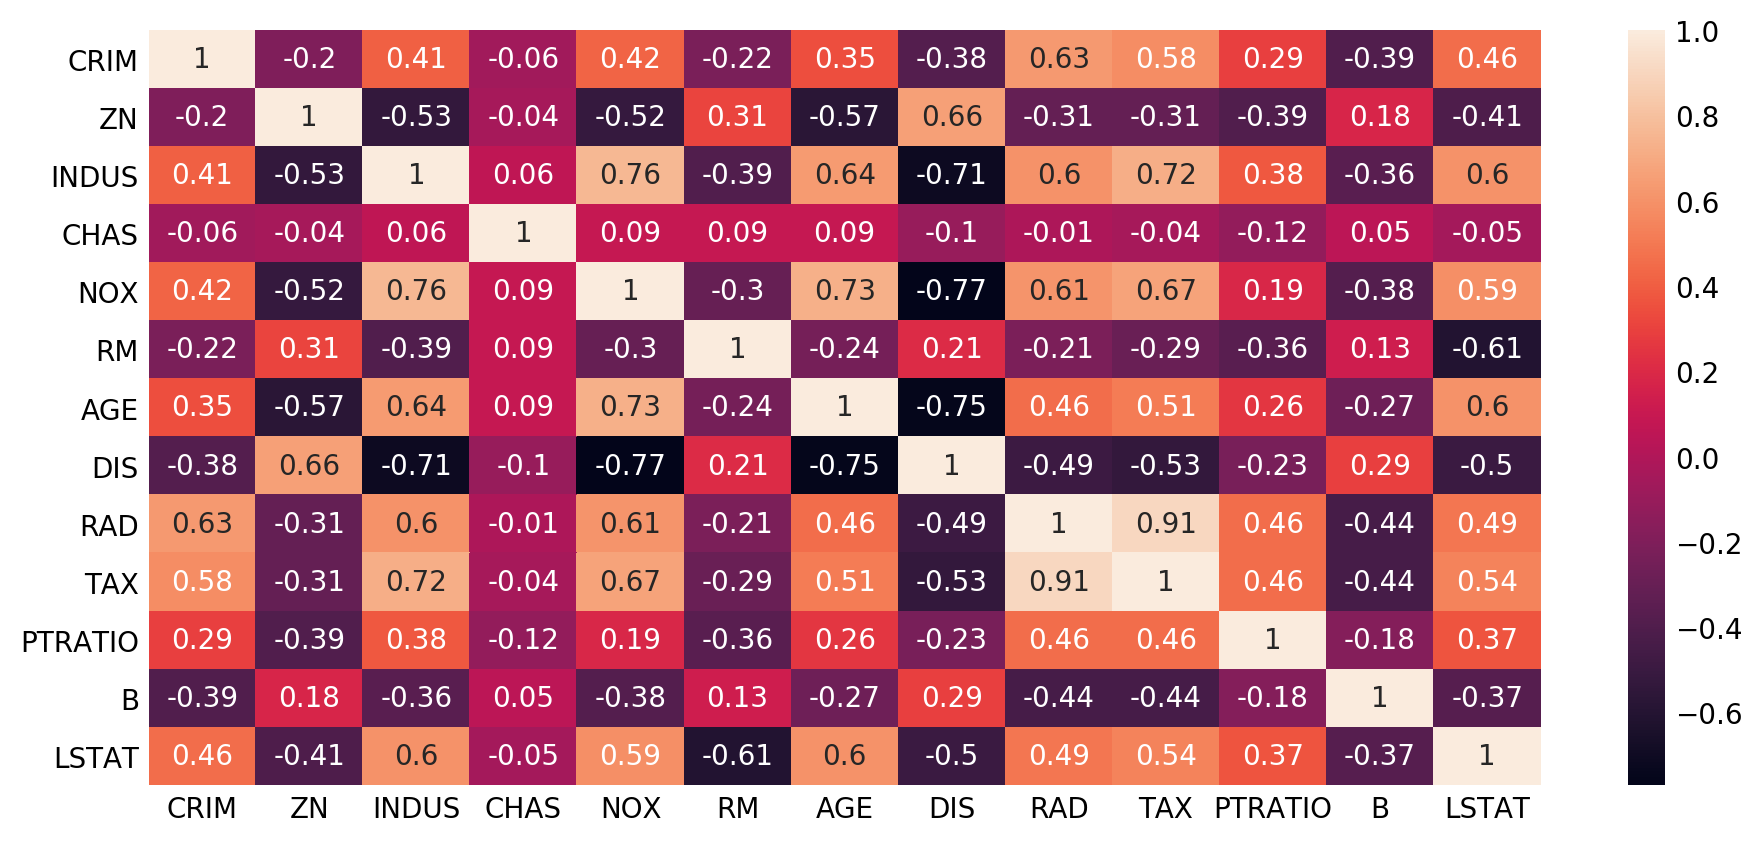

In [3]:
fig = plt.figure(figsize=(10,5),dpi=200)
ax = fig.add_subplot(111)
sns.heatmap(dataframe.corr().round(2),annot=True,ax=ax)

# Drop Low Co-related Column

In [4]:
new_dataFrame = dataframe.drop(['B', 'LSTAT','PTRATIO'],axis=1)

# Check For Variance 

In [5]:
new_dataFrame.var()

CRIM        73.986578
ZN         543.936814
INDUS       47.064442
CHAS         0.064513
NOX          0.013428
RM           0.493671
AGE        792.358399
DIS          4.434015
RAD         75.816366
TAX      28404.759488
dtype: float64

# Remove Low variance Column

In [6]:
final_data = new_dataFrame.drop(['CHAS','NOX','RM','DIS'],axis=1)
final_data.head(5)

,CRIM,ZN,INDUS,AGE,RAD,TAX
0,0.00632,18.0,2.31,65.2,1.0,296.0
1,0.02731,0.0,7.07,78.9,2.0,242.0
2,0.02729,0.0,7.07,61.1,2.0,242.0
3,0.03237,0.0,2.18,45.8,3.0,222.0
4,0.06905,0.0,2.18,54.2,3.0,222.0


# Convert DataFrame To Numpy Array

In [7]:
y = final_data.values[:,:1]
x = final_data.values[:,1:]

# Magic Function

In [8]:
y = (y - y.min())/(y.max() - y.min())

# Plot OverAll DataSet

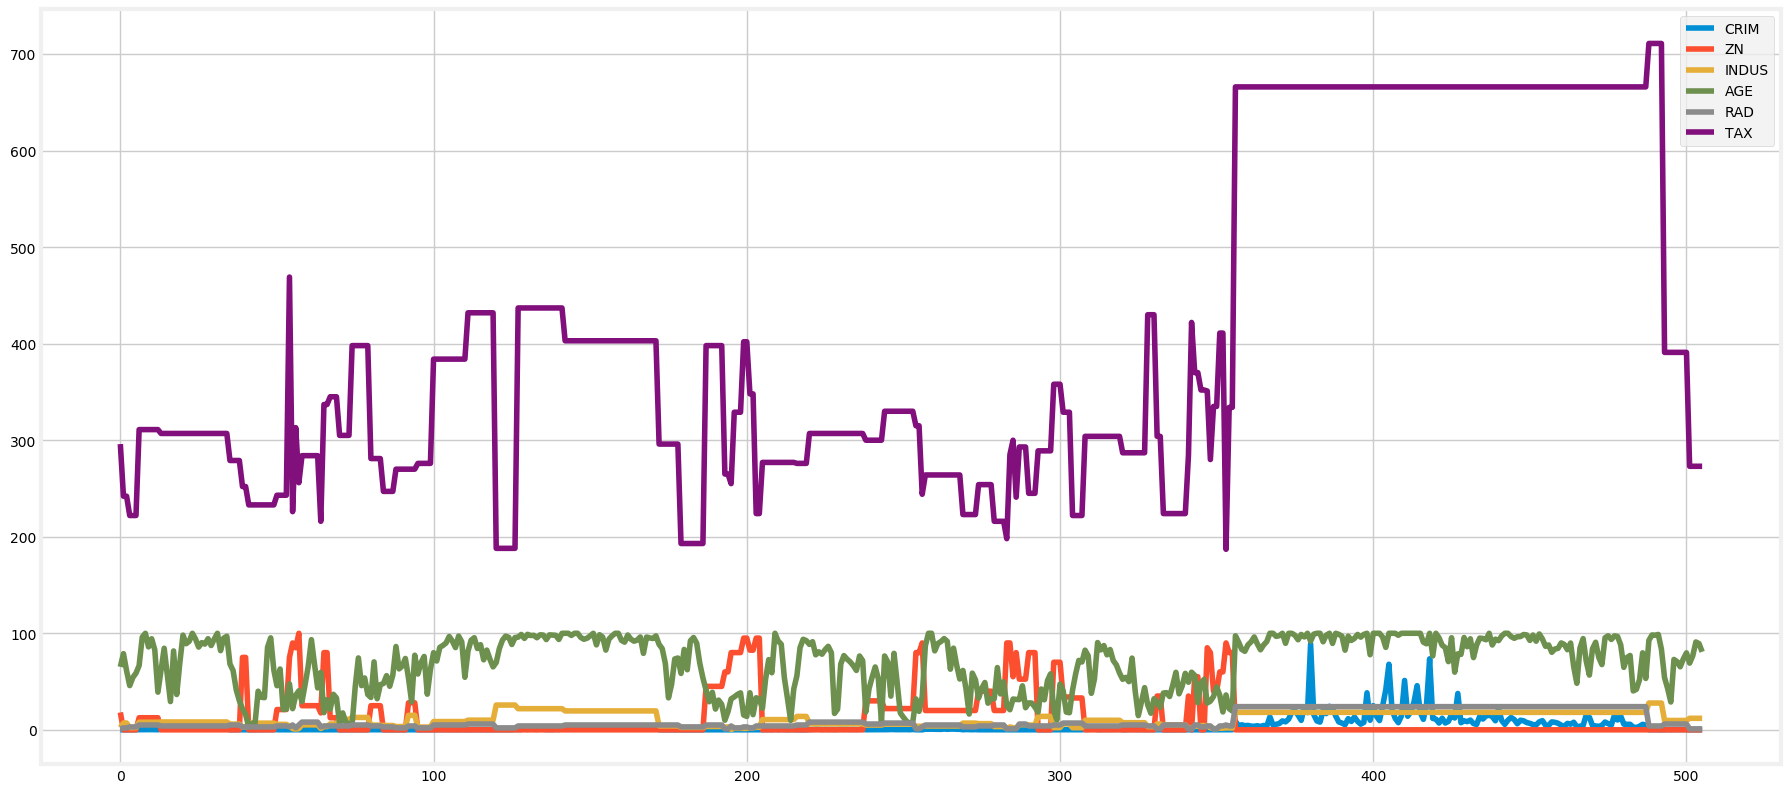

In [9]:
fig = plt.figure(figsize=(20,10),dpi=100)
ax = fig.add_subplot(111)
final_data.plot(ax=ax)
ax.set_facecolor('white')

# Data In 3D

<IPython.core.display.Javascript object>


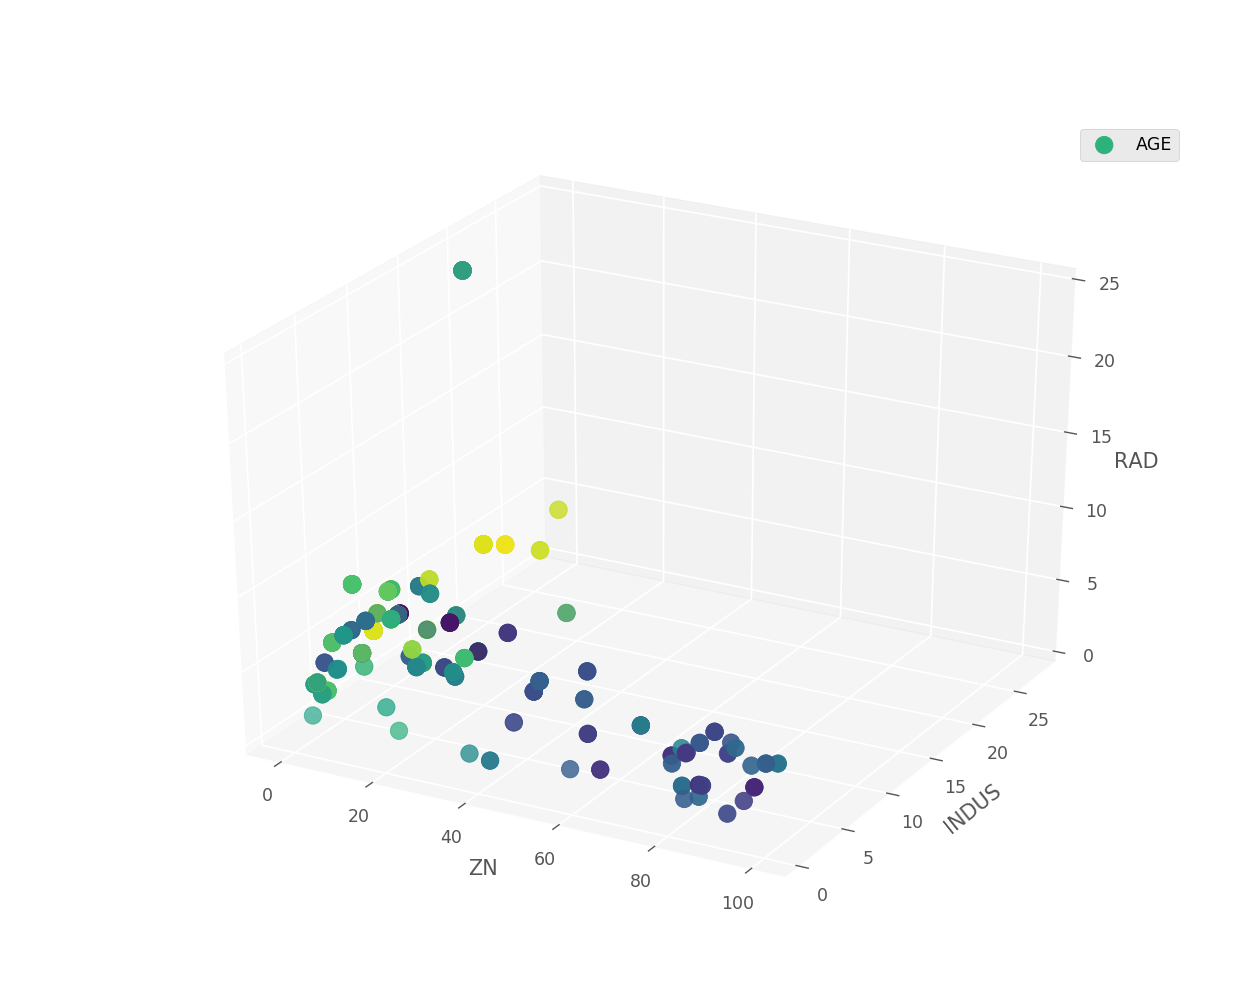

In [13]:
%matplotlib notebook
fig = plt.figure(figsize=(10,8),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')
ax.scatter(x[:,0],x[:,1],x[:,3],s=y+ 100,c=x[:,2], label='AGE')
ax.set_xlabel('ZN')
ax.set_ylabel('INDUS')
ax.set_zlabel('RAD')
ax.legend()

# Finally LR

In [14]:
def calculate_weight(x, y):
    print("Iteration", c_("Error", "red"), c_(
        "Bias", "blue", attrs=["underline"]), 
          "\tWeight", sep="\t\t")
    x = np.insert(x, 0, 1, axis=1)
    theta = np.zeros(len(x[0]))
    m = y.size
    print_interval = change = lr = old_error = 1
    count = 0
    lr = 0.0000001

    while abs(change) > 0.0001:

        h = (x @ theta).reshape(-1, 1)

        error = ((y - h)**2).mean()

        theta = theta - lr * (1 / m) * (x.T.dot(h - y)).reshape(-1)

        if not count % print_interval:
            print_interval *= 2
            print(str(count).center(10), c_(error, "red"), c_(
                theta[0], "green"), c_(theta[1], "grey"), sep="\t")
        change = error - old_error
        count += 1
        old_error = error

    print(str(count + 1).center(10), c_(error, "red"),
          c_(theta[0], "green"), c_(theta[1], "grey"), sep="\t")

    return theta


def Predict(p, theta):
    x = np.insert(p, 0, 1, axis=0)
    return x.dot(theta)

In [15]:
theta = calculate_weight(x, y)

Iteration		Error		Bias			Weight
    0     	0.01097223751169032	4.0544098264629e-09	9.604055440774464e-10
    2     	0.010703317764952841	1.1838440595996634e-08	1.9259247618545065e-10
    4     	0.010455274948215255	1.9203747035177308e-08	-4.041172439976763e-09
    8     	0.010015459765341708	3.27439147502935e-08	-2.2361191360708027e-08
    11    	0.00991617044033316	3.589239592360872e-08	-2.889880458524775e-08


<IPython.core.display.Javascript object>


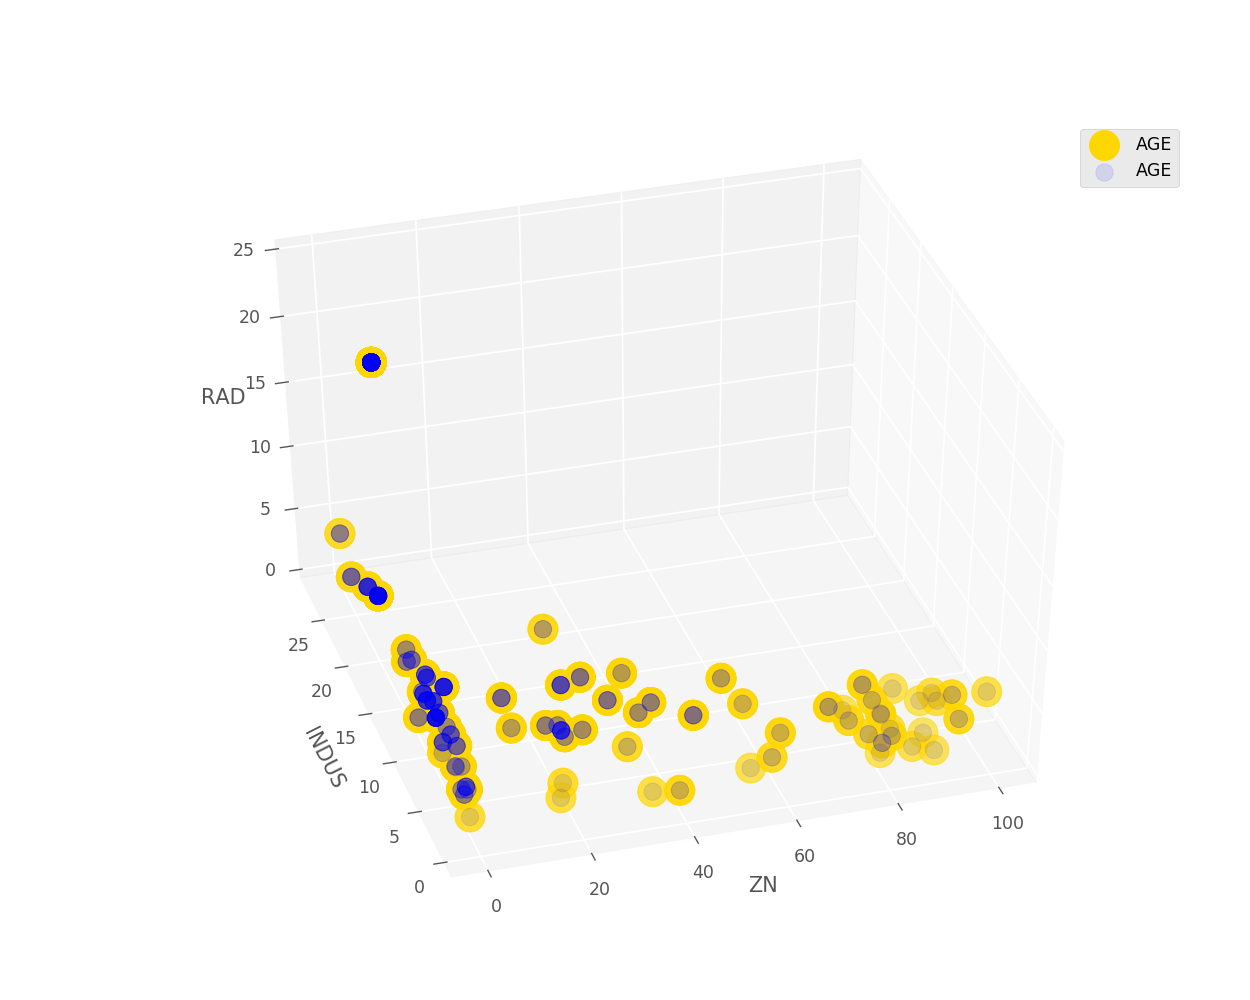

In [20]:
y_cap = np.array([Predict(i,theta) for i in x])
%matplotlib notebook
fig = plt.figure(figsize=(10,8),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')
ax.scatter(x[:,0],x[:,1],x[:,3],s=y + 300,c='gold', label='AGE')
ax.scatter(x[:,0],x[:,1],x[:,3],s= y_cap + 100,c='blue', 
           label='AGE', alpha=0.1)
ax.set_xlabel('ZN')
ax.set_ylabel('INDUS')
ax.set_zlabel('RAD')
ax.legend()

# Check Accuracy

In [21]:
from sklearn.metrics import mean_squared_error

In [22]:
"Accuracy id : ", 100 - mean_squared_error(y,y_cap)

('Accuracy id : ', 99.99017918767224)

## Linear regression with Sklearn

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
model = LinearRegression() 

In [25]:
model.fit(x,y) 
100 - mean_squared_error(y,model.predict(x))

99.9943905271095

In [26]:
prediction = model.predict(x) # predict 

<IPython.core.display.Javascript object>


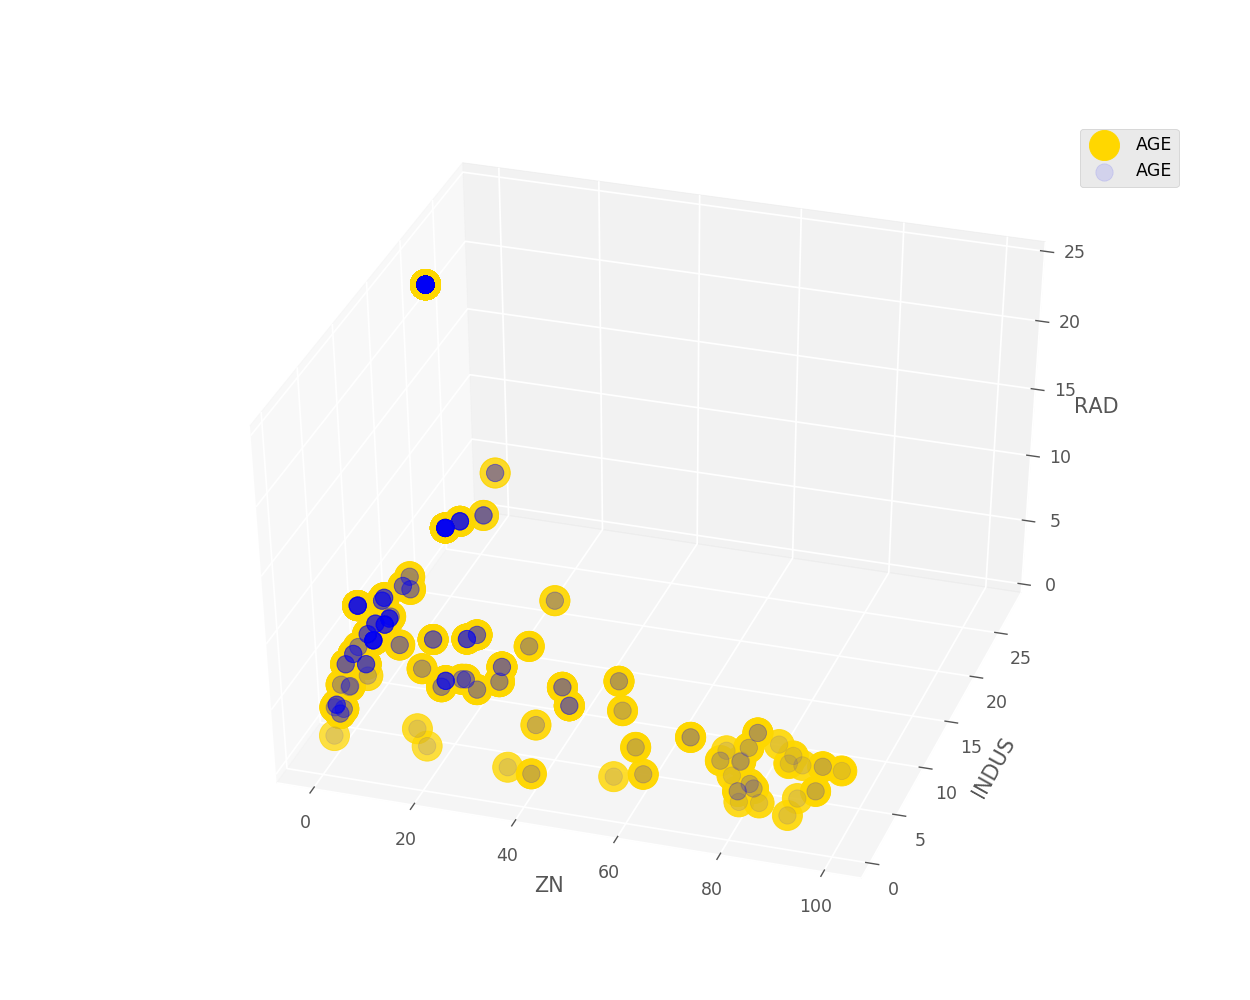

In [30]:
y_cap = prediction
%matplotlib notebook
fig = plt.figure(figsize=(10,8),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')
ax.scatter(x[:,0],x[:,1],x[:,3],s=y + 300,c='gold', label='AGE')
ax.scatter(x[:,0],x[:,1],x[:,3],s= y_cap + 100,c='blue', label='AGE', alpha=0.1)
ax.set_xlabel('ZN')
ax.set_ylabel('INDUS')
ax.set_zlabel('RAD')
ax.legend()

### Using SVM

In [28]:
from sklearn.svm import SVR

In [29]:
model = SVR(kernel="linear",C=100,degree=2)

In [23]:
model.fit(x,y) # fit data

SVR(C=100, cache_size=200, coef0=0.0, degree=2, epsilon=0.1, gamma='scale',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [24]:
prediction = model.predict(x) # predict 

<IPython.core.display.Javascript object>


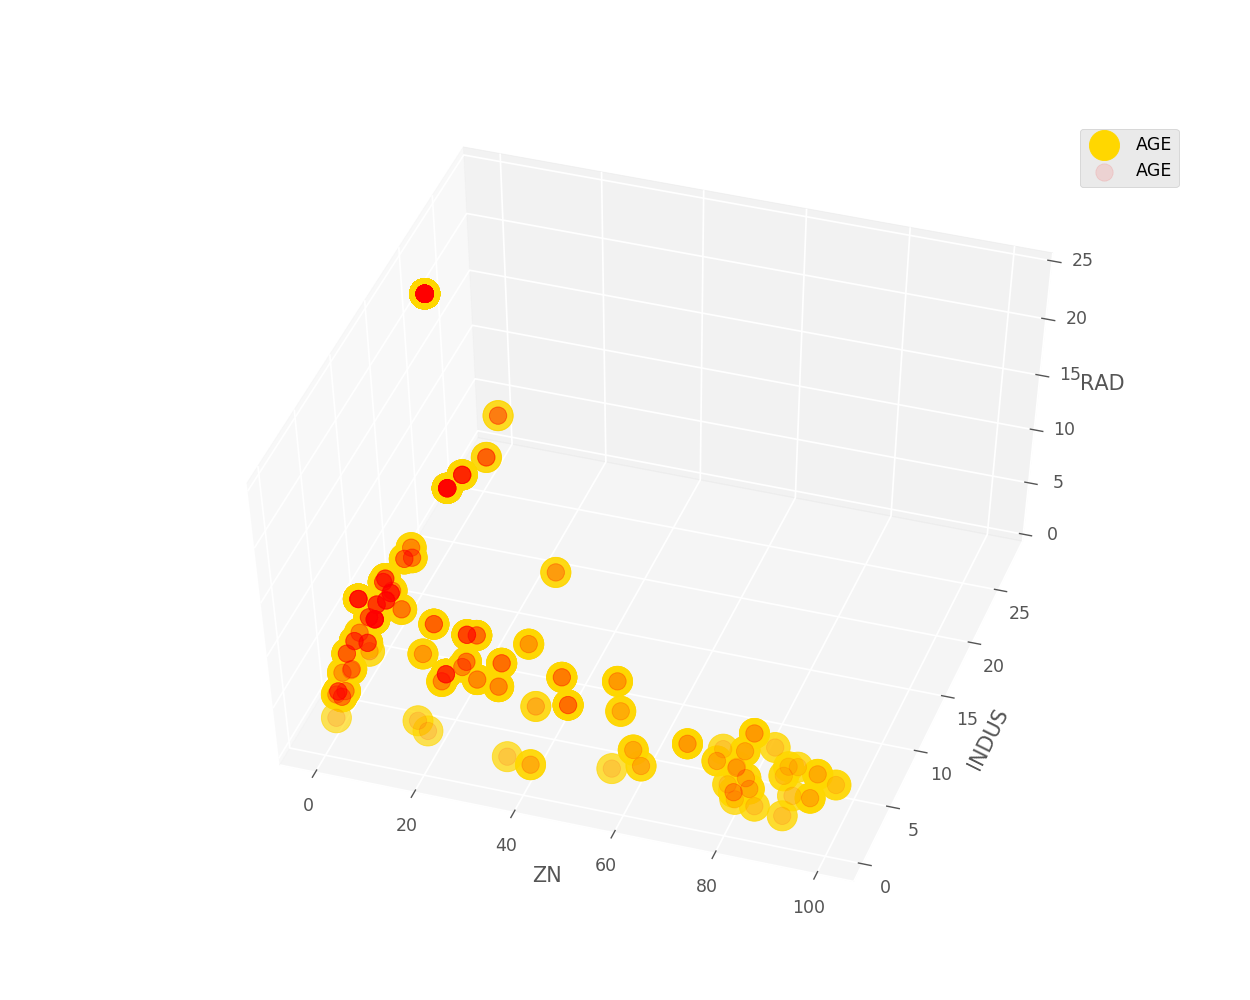

In [31]:
y_cap = prediction
%matplotlib notebook
fig = plt.figure(figsize=(10,8),dpi=100)
ax = fig.add_subplot(111, projection='3d')
ax.set_facecolor('white')
ax.scatter(x[:,0],x[:,1],x[:,3],s=y + 300,c='gold', label='AGE')
ax.scatter(x[:,0],x[:,1],x[:,3],s= y_cap + 100,c='red', label='AGE', alpha=0.1)
ax.set_xlabel('ZN')
ax.set_ylabel('INDUS')
ax.set_zlabel('RAD')
ax.legend()